## VAE with NN-FullyConnected 2D and MNIST

In [1]:
import tensorflow as tf
import time
import numpy as np
print(tf.__version__)

# %matplotlib inline
# %load_ext autoreload
# %autoreload 2
# %matplotlib notebook

/home/computadora1/miniconda3/envs/tf-1.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.4.0


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis


def mnist_grid(X):
    X = X.reshape([-1,28,28])
    num_images = X.shape[0]
    fig = figure()
    fig.set_size_inches(10,10)
    
    for i in range(num_images):
        a = fig.add_subplot(1, num_images, i+1)
        image = X[i,:]
        imshow(image, cmap='gray')
        axis('off')
    
    plt.show()

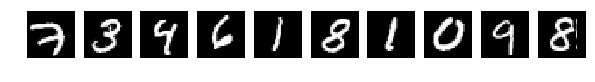

(3000, 784)
(750, 784)


numpy.ndarray

In [4]:
X_train = mnist.train.images[:3000]
X_valid= mnist.validation.images[:750]
mnist_grid(X_train[:10])
print(X_train.shape)
print(X_valid.shape)
type(X_train)

In [5]:
tf.reset_default_graph()

n_inputs = X_train.shape[1]
n_hidden1 = 256
n_hidden2 = 256
n_hidden3 = 32
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs

x = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden1 = tf.layers.dense(x, n_hidden1, activation=tf.nn.elu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.elu)
hidden3_mean = tf.layers.dense(hidden2, n_hidden3, activation=None)
hidden3_sigma = tf.layers.dense(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3 = hidden3_mean + hidden3_sigma * noise
hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.elu)
hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.elu)
logits = tf.layers.dense(hidden5, n_outputs, activation=None)
outputs = tf.sigmoid(logits)


#
# Funcion de perdida (MSE) y entrenamiento
#
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=logits)
xentropy_loss = tf.reduce_sum(xentropy)
eps = 1e-10
latent_loss = 0.5 * tf.reduce_sum(
    # centre en 0 y los demas los centre a 1
    tf.square(hidden3_sigma) + tf.square(hidden3_mean) - 1 - tf.log(eps + tf.square(hidden3_sigma))
) 

loss = xentropy_loss + latent_loss

mse_loss = tf.reduce_mean(tf.reduce_sum(tf.square(x - outputs), axis=1))

optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)
saver = tf.train.Saver()

In [6]:
tf.reset_default_graph()

n_inputs = X_train.shape[1]
n_hidden1 = 256
n_hidden2 = 256
n_hidden3 = 32
n_hidden4 = n_hidden2
n_hidden5 = n_hidden1
n_outputs = n_inputs

x = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden1 = tf.layers.dense(x, n_hidden1, activation=tf.nn.elu)
hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.elu)
hidden3_mean = tf.layers.dense(hidden2, n_hidden3, activation=None)
hidden3_sigma = tf.layers.dense(hidden2, n_hidden3, activation=None)
noise = tf.random_normal(tf.shape(hidden3_sigma), dtype=tf.float32)
hidden3 = hidden3_mean + hidden3_sigma * noise
hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=tf.nn.elu)
hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=tf.nn.elu)
logits = tf.layers.dense(hidden5, n_outputs, activation=None)
outputs = tf.sigmoid(logits)

# MSE loss
def lossFunction(X):
    mse_loss = tf.reduce_mean(tf.reduce_sum(tf.square(X - outputs), axis=1))
    return mse_loss

#
# Funcion de perdida (MSE) y entrenamiento
#
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=x, logits=logits)
xentropy_loss = tf.reduce_sum(xentropy)
eps = 1e-10
latent_loss = 0.5 * tf.reduce_sum(
    # centre en 0 y los demas los centre a 1
    tf.square(hidden3_sigma) + tf.square(hidden3_mean) - 1 - tf.log(eps + tf.square(hidden3_sigma))
) 

loss = xentropy_loss + latent_loss

optimizer = tf.train.AdamOptimizer()
training_op = optimizer.minimize(loss)

loss_training = lossFunction(X_train) 
loss_validation = lossFunction(X_valid)

saver = tf.train.Saver()

In [7]:
n_iterations = 10001

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(n_iterations):
        _, mse = sess.run([training_op, mse_loss], feed_dict={x: X})
        
        if iteration % 100 == 0:
            print('Iteración: {:04d}, MSE: {:.9f}'.format(iteration, mse))
            R = sess.run(outputs, feed_dict={x:X[:10]})
            mnist_grid(R)
    saver.save(sess, "./VAE.ckpt")

NameError: name 'X' is not defined

/home/computadora1/miniconda3/envs/tf-1.5/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Iteracion: 0000
MSE_train: 183.266723633
MSE_valid: 179.084442139
Iteracion: 0100
MSE_train: 40.531349182
MSE_valid: 39.884262085
Iteracion: 0200
MSE_train: 31.156316757
MSE_valid: 31.042732239
Iteracion: 0300
MSE_train: 27.079961777
MSE_valid: 27.718334198
Iteracion: 0400
MSE_train: 21.380931854
MSE_valid: 21.960168839
Iteracion: 0500
MSE_train: 18.747453690
MSE_valid: 19.748104095
Iteracion: 0600
MSE_train: 16.761035919
MSE_valid: 17.991750717
Iteracion: 0700
MSE_train: 15.493933678
MSE_valid: 16.956392288
Iteracion: 0800
MSE_train: 14.280868530
MSE_valid: 16.143825531
Iteracion: 0900
MSE_train: 13.387927055
MSE_valid: 15.414913177
Iteracion: 1000
MSE_train: 12.718621254
MSE_valid: 15.025743484
Iteracion: 1100
MSE_train: 12.014859200
MSE_valid: 14.878195763
Iteracion: 1200
MSE_train: 11.510489464
MSE_valid: 14.433108330
Iteracion: 1300
MSE_train: 11.026132584
MSE_valid: 14.243072510
Iteracion: 1400
MSE_train: 10.705769539
MSE_valid: 14.028192520
Iteracion: 1500
MSE_train: 10.16312885

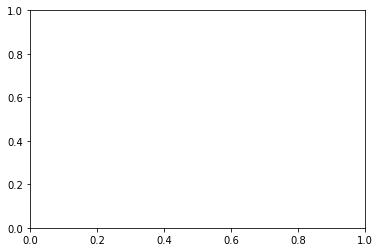

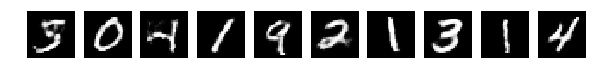

In [14]:
n_iterations = 10001

points = []
points_train = []
points_valid = []

fig = plt.figure()
ax = fig.add_subplot(111)

plt.ion()

fig.show()
fig.canvas.draw()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(n_iterations):
        
        _, mse_train = sess.run([training_op, loss_training], feed_dict={x: X_train})
        mse_valid = sess.run([loss_validation],feed_dict={x:X_valid})
                
        points_train.append(mse_train)
        points_valid.append(mse_valid)
        
        points = np.arange(iteration + 1)
        
#         ax.clear()
        
#         ax.plot(points, points_train, color='blue')
#         ax.plot(points, points_valid, color='red')
#         fig.canvas.draw()
        #time.sleep(1.0)
        #plt.show()
        
        if iteration % 100 == 0:
            print('Iteracion: {:04d}'.format(iteration))
            print('MSE_train: {:.9f}'.format(mse_train))
            print('MSE_valid: {:.9f}'.format(mse_valid[0]))
            #print(mse_valid)
            
    saver.save(sess, "./VAE.ckpt")
    
    R = sess.run(outputs, feed_dict={x:X_valid[:10]})
    mnist_grid(R)

INFO:tensorflow:Restoring parameters from ./VAE.ckpt


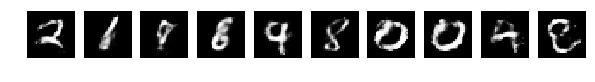

In [15]:
n_digits = 10
random_codings = np.random.normal(size=[n_digits, n_hidden3])

with tf.Session() as sess:
  saver.restore(sess, "./VAE.ckpt")
  generated_images = sess.run(outputs, feed_dict={hidden3: random_codings})

mnist_grid(generated_images)
#mnist_grid(X_train[random_codings])


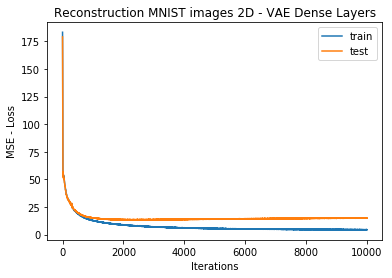

In [16]:
points_valid[-10:]

points = np.arange(len(points_train))
plt.title('Reconstruction MNIST images 2D - VAE Dense Layers')
plt.ylabel('MSE - Loss')
plt.xlabel('Iterations')
plt.plot(points, points_train, label='train')
plt.plot(points, points_valid, label='test')
plt.legend()

plt.show()

## VAE with CNN 2D and MNIST 

https://github.com/keras-team/keras/blob/master/examples/variational_autoencoder_deconv.py

In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from keras.layers import Input, Dense, Lambda, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

/home/computadora1/miniconda3/envs/tf-1.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# input image dimensions
img_rows, img_cols, img_chns= 28, 28, 1

filters = 64
batch_size = 100

if K.image_data_format() == 'channels_first':
    original_img_size = (img_chns, img_rows, img_cols)
else:
    original_img_size = (img_rows, img_cols, img_chns)
    
latent_dim = 2
intermediate_dim = 128
epsilon_std = 1.0
epochs = 5

In [3]:
## ENCODER

x = Input(shape=original_img_size)
conv_1 = Conv2D(img_chns,
                kernel_size = (2, 2),
                padding = 'same',
                activation = 'relu')(x)

conv_2 = Conv2D(64,
                kernel_size = (2, 2),
                padding = 'same',
                activation = 'relu',
                strides = 2)(conv_1)

conv_3 = Conv2D(64,
                kernel_size = (2, 2),
                padding = 'same',
                activation = 'relu')(conv_2)
                
conv_4 = Conv2D(64,
                kernel_size = (3, 3),
                padding = 'same',
                activation = 'relu')(conv_3)
                
flat = Flatten()(conv_4)
hidden = Dense(intermediate_dim, activation='relu')(flat)
                
z_mean = Dense(latent_dim)(hidden)
z_log_var = Dense(latent_dim)(hidden)

In [4]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean = 0., stddev = epsilon_std)
    return z_mean + K.exp(z_log_var) * epsilon

In [5]:
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

decoder_hid = Dense(intermediate_dim, activation='relu')
decoder_upsample = Dense(filters * 14 * 14, activation='relu')

if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 14, 14)
else:
    output_shape = (batch_size, 14, 14, filters)
    
decoder_reshape = Reshape(output_shape[1:])

decoder_deconv_1 = Conv2DTranspose(filters,
                                   kernel_size=3,
                                   padding='same',
                                   activation='relu')

decoder_deconv_2 = Conv2DTranspose(filters,
                                   kernel_size=3,
                                   padding='same',
                                   activation='relu')

if K.image_data_format() == 'channels_first':
    output_shape = (batch_size, filters, 29, 29)
else:
    output_shape = (batch_size, 29, 29, filters)

decoder_deconv_3_upsamp = Conv2DTranspose(filters,
                                           kernel_size=(3, 3),
                                           strides=2,
                                           padding='valid',
                                           activation='relu')

decoder_mean_squash = Conv2D(img_chns,
                             kernel_size=(2, 2),
                             padding='valid',
                             activation='sigmoid')

In [6]:
hid_decoded = decoder_hid(z)
up_decoded = decoder_upsample(hid_decoded)
reshape_decoded = decoder_reshape(up_decoded)
deconv_1_decoded = decoder_deconv_1(reshape_decoded)
deconv_2_decoded = decoder_deconv_2(deconv_1_decoded)
x_decoded_relu = decoder_deconv_3_upsamp(deconv_2_decoded)
x_decoded_mean_squash = decoder_mean_squash(x_decoded_relu)

In [7]:
# Instantiate VAE model
vae = Model(x, x_decoded_mean_squash)

In [8]:
# Compute VAE loss
xent_loss = img_rows * img_cols * metrics.binary_crossentropy(
    K.flatten(x),
    K.flatten(x_decoded_mean_squash))

kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)

vae.compile(optimizer='rmsprop', loss=None)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 1)    5           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 14, 14, 64)   320         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 64)   16448       conv2d_2[0][0]                   
__________________________________________________________________________________________________
conv2d_4 (

/home/computadora1/miniconda3/envs/tf-1.5/lib/python3.5/site-packages/ipykernel_launcher.py:10: UserWarning: Output "conv2d_5" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "conv2d_5" during training.
  # Remove the CWD from sys.path while we load stuff.


In [9]:
(x_train, _), (x_test, y_test) = mnist.load_data()

In [10]:
x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((x_train.shape[0],) + original_img_size)
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((x_test.shape[0],) + original_img_size)

print('x_train.shape: ', x_train.shape)

x_train.shape:  (60000, 28, 28, 1)


In [11]:
vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 18s 294us/step - loss: 176.8941 - val_loss: 159.3506
Epoch 2/5
60000/60000 [==============================] - 16s 269us/step - loss: 155.2711 - val_loss: 151.9415
Epoch 3/5
60000/60000 [==============================] - 16s 274us/step - loss: 150.0920 - val_loss: 148.5936
Epoch 4/5
60000/60000 [==============================] - 16s 274us/step - loss: 147.0273 - val_loss: 147.0961
Epoch 5/5
60000/60000 [==============================] - 16s 274us/step - loss: 144.9472 - val_loss: 146.7195


In [12]:
# build a model to project inputs on the latent space
encoder = Model(x, z_mean)

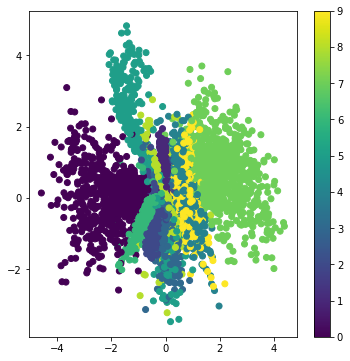

In [15]:
# display a 2D pot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [12]:
# Build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_hid_decoded = decoder_hid(decoder_input)
_up_decoded = decoder_upsample(_hid_decoded)
_reshape_decoded = decoder_reshape(_up_decoded)
_deconv_1_decoded = decoder_deconv_1(_reshape_decoded)
_deconv_2_decoded = decoder_deconv_2(_deconv_1_decoded)
_x_decoded_relu = decoder_deconv_3_upsamp(_deconv_2_decoded)
_x_decoded_mean_squash = decoder_mean_squash(_x_decoded_relu)
generator = Model(decoder_input, _x_decoded_mean_squash)

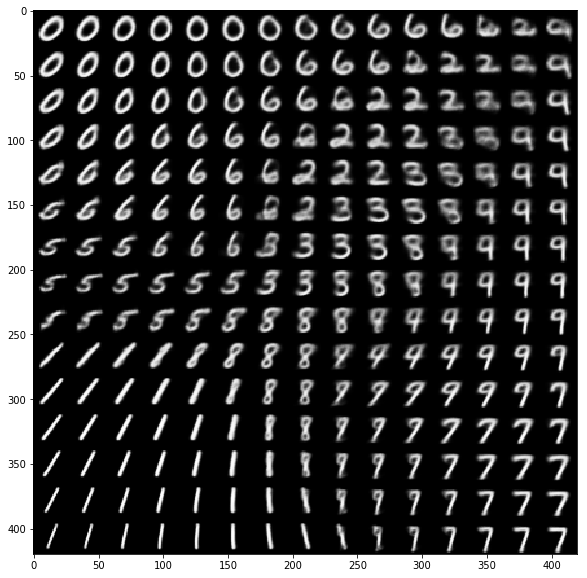

In [14]:
# Display a 2D manifold of the digits
n = 15 # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))


# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = generator.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()